In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [ ]:
data = pd.read_csv("data.csv").dropna()
data.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1.0,3.0,3.0,1967.0,1.0,1.0,48.0,8.297631,5.935734,6021
1,2,287.678577,1.0,2.0,1.0,1949.0,0.0,1.0,37.0,6.061466,10.827392,5914
2,3,232.998485,1.0,3.0,2.0,1923.0,1.0,0.0,14.0,2.911442,6.904599,4645
3,4,199.664621,5.0,2.0,2.0,1918.0,0.0,0.0,17.0,2.070949,8.284019,5831
4,5,89.004660,4.0,3.0,3.0,1999.0,1.0,0.0,34.0,1.523278,14.648277,6199


In [ ]:
data.columns

Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula='Price ~ Square_Feet + Num_Bedrooms + Num_Bathrooms + Num_Floors + Year_Built + Has_Garden + Has_Pool + Garage_Size + Location_Score + Distance_to_Center', data=data)
res = model.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:57:07   Log-Likelihood:                -3131.7
No. Observations:                 470   AIC:                             6285.
Df Residuals:                     459   BIC:                             6331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.873e+04    498.479    -57.643      0.000   -2.97e+04   -2.78e+04
Square_Feet           10.1739      0.119     85.842      0.000       9.941      10.407
Num_Bedrooms         505.4472      6.161     82.040      0.000     493.340     517.554
Num_Bathrooms        295.9029     10.903     27.141      0.000     274.478     317.328
Num_Floors           215.2305     11.084     19.419      0.000     193.450     237.011
Year_Built            15.0691      0.253     59.606      0.000      14.572      15.566
Has_Garden           298.8043     17.850     16.740      0.000     263.726     333.883
Has_Pool             479.5410     18.035     26.589      0.000     444.099     514.983
Garage_Size           11.3505      0.772     14.702      0.000       9.833      12.868
Location_Score        48.1382      3.126     15.399      0.000      41.995      54.281
Distance_to_Center   -20.1032      1.614    -12.454      0.000     -23.275     -16.931
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.069
Skew:                          -0.030   Prob(JB):                        0.966
Kurtosis:                       3.005   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
start = datetime(1990, 1, 1)
end = start + timedelta(days=199)
dates = [start + timedelta(x) for x in range(200)]
data = {
    'Date': dates,
    "Values": np.linspace(0, 50, 200) + np.random.normal(scale=5, size=200) + np.sin(np.linspace(0, 2*np.pi, 200)),
    "A": [random.choice([1, 2, 3]) for _ in range(200)],
    "B": np.random.randint(1, 100, size=200),
    "C": np.random.choice([True, False], size=200)
}


In [ ]:
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Values,A,B,C
0,1990-01-01,-4.732866,2,13,False
1,1990-01-02,-4.453768,3,72,True
2,1990-01-03,0.015770,2,23,False
3,1990-01-04,-0.140578,2,1,False
4,1990-01-05,1.565860,3,53,False


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
res = seasonal_decompose(df["Values"], period=10, model="additive")

In [ ]:
import matplotlib.pyplot as plt

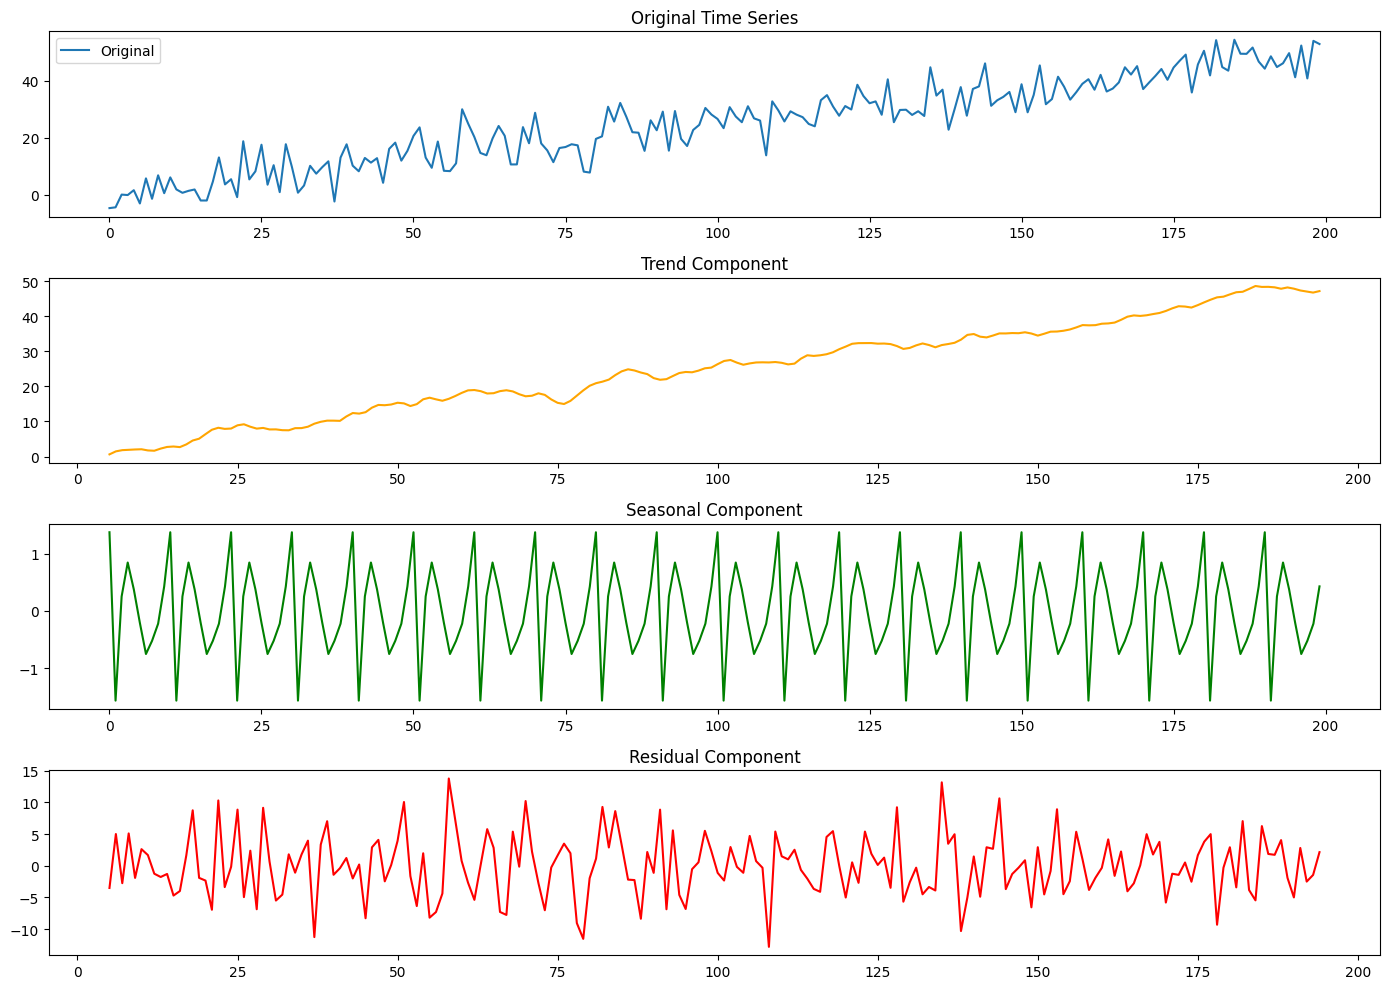

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df["Values"], label="Original")
plt.title("Original Time Series")
plt.legend()

plt.subplot(412)
plt.plot(res.trend, color='orange')
plt.title("Trend Component")

plt.subplot(413)
plt.plot(res.seasonal, color='green')
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(res.resid, color='red')
plt.title("Residual Component")

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
res = adfuller(df["Values"])

In [ ]:
res

(-0.729173373376021,
 0.8390475869831415,
 15,
 184,
 {'1%': -3.466398230774071,
  '5%': -2.8773796387256514,
  '10%': -2.575213838610586},
 1162.516617767465)

In [ ]:
print("ADF Statistic:", res[0])
print("p-value:", res[1])
if res[1] < 0.05:
    print("Residuals are stationary. Reject null")
else:
    print("Residuals are not stationary. Failed to reject null")

ADF Statistic: -0.24498257721582561
p-value: 0.9329430757392739
Residuals are not stationary. Failed to reject null


In [ ]:
df["diff values"] = df["Values"].diff()
df.head(10)

,Date,Values,A,B,C,diff values
0,1990-01-01,-4.732866,2,13,False,NaN
1,1990-01-02,-4.453768,3,72,True,0.279098
2,1990-01-03,0.015770,2,23,False,4.469539
3,1990-01-04,-0.140578,2,1,False,-0.156349
4,1990-01-05,1.565860,3,53,False,1.706438
5,1990-01-06,-3.101179,2,94,False,-4.667039
6,1990-01-07,5.713540,2,5,True,8.814719
7,1990-01-08,-1.459312,1,77,True,-7.172852
8,1990-01-09,6.789941,3,61,False,8.249253
9,1990-01-10,0.512933,2,91,False,-6.277007


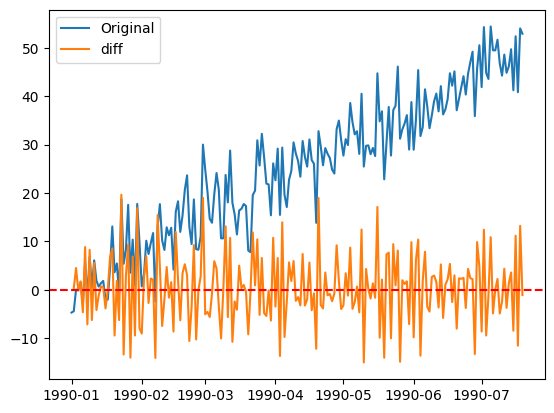

In [ ]:
plt.plot(df["Date"], df["Values"], label="Original")
plt.plot(df["Date"], df["diff values"], label="diff")
plt.axhline(y=0, color='r', linestyle="--")
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv("/content/data2.csv")
data["Month"] = pd.to_datetime(data["Month"])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


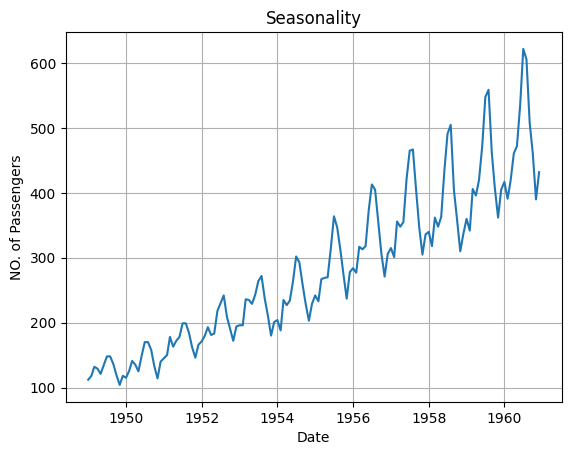

In [ ]:
plt.plot(data["Month"], data["#Passengers"])
plt.xlabel("Date")
plt.ylabel("NO. of Passengers")
plt.title("Seasonality")
plt.grid()
plt.show()

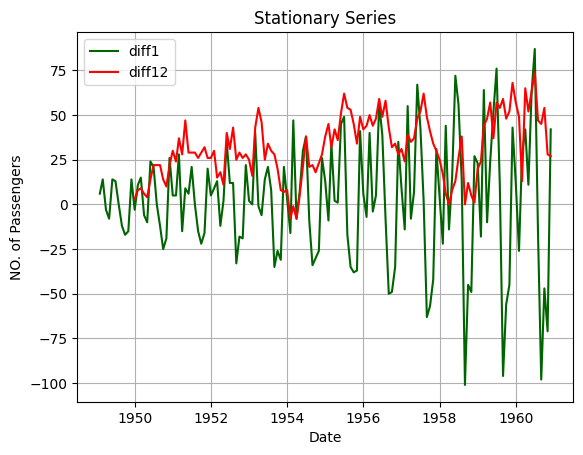

In [ ]:
data["diff1"] = data["#Passengers"].diff(1)
data["diff12"] = data["#Passengers"].diff(12)
plt.plot(data["Month"], data["diff1"], color="darkgreen", label="diff1")
plt.plot(data["Month"], data["diff12"], label="diff12", color="red")
plt.xlabel("Date")
plt.ylabel("NO. of Passengers")
plt.legend()
plt.title("Stationary Series")
plt.grid()
plt.show()

In [ ]:
res = adfuller(data["diff1"].dropna())
print(res)
res = adfuller(data["diff12"].dropna())
print(res)

(-2.8292668241700047, 0.05421329028382478, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)
(-3.383020726492481, 0.011551493085514952, 1, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.527129208137)
